In [217]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

In [218]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
cervical_cancer_risk_factors = fetch_ucirepo(id=383) 
  
# data (as pandas dataframes) 
X = cervical_cancer_risk_factors.data.features 

  
# metadata 
print(cervical_cancer_risk_factors.metadata) 
  
# variable information 
print(cervical_cancer_risk_factors.variables) 


{'uci_id': 383, 'name': 'Cervical Cancer (Risk Factors)', 'repository_url': 'https://archive.ics.uci.edu/dataset/383/cervical+cancer+risk+factors', 'data_url': 'https://archive.ics.uci.edu/static/public/383/data.csv', 'abstract': 'This dataset focuses on the prediction of indicators/diagnosis of cervical cancer. The features cover demographic information, habits, and historic medical records.', 'area': 'Health and Medicine', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 858, 'num_features': 36, 'feature_types': ['Integer', 'Real'], 'demographics': ['Age', 'Other'], 'target_col': None, 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 2017, 'last_updated': 'Sun Mar 10 2024', 'dataset_doi': '10.24432/C5Z310', 'creators': ['Kelwin Fernandes', 'Jaime Cardoso', 'Jessica Fernandes'], 'intro_paper': {'ID': 419, 'type': 'NATIVE', 'title': 'Transfer Learning with Partial Observability Applied to Cervi

In [219]:
X

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18,4.0,15.0,1.0,0.0,0.0,0.0,0.0,0.00,0.0,...,NaN,NaN,0,0,0,0,0,0,0,0
1,15,1.0,14.0,1.0,0.0,0.0,0.0,0.0,0.00,0.0,...,NaN,NaN,0,0,0,0,0,0,0,0
2,34,1.0,NaN,1.0,0.0,0.0,0.0,0.0,0.00,0.0,...,NaN,NaN,0,0,0,0,0,0,0,0
3,52,5.0,16.0,4.0,1.0,37.0,37.0,1.0,3.00,0.0,...,NaN,NaN,1,0,1,0,0,0,0,0
4,46,3.0,21.0,4.0,0.0,0.0,0.0,1.0,15.00,0.0,...,NaN,NaN,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
853,34,3.0,18.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,...,NaN,NaN,0,0,0,0,0,0,0,0
854,32,2.0,19.0,1.0,0.0,0.0,0.0,1.0,8.00,0.0,...,NaN,NaN,0,0,0,0,0,0,0,0
855,25,2.0,17.0,0.0,0.0,0.0,0.0,1.0,0.08,0.0,...,NaN,NaN,0,0,0,0,0,0,1,0
856,33,2.0,24.0,2.0,0.0,0.0,0.0,1.0,0.08,0.0,...,NaN,NaN,0,0,0,0,0,0,0,0


In [245]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       1000 non-null   float64
 1   1       1000 non-null   float64
 2   2       1000 non-null   float64
 3   3       1000 non-null   float64
 4   4       1000 non-null   float64
 5   5       1000 non-null   float64
 6   6       1000 non-null   float64
 7   7       1000 non-null   float64
 8   8       1000 non-null   float64
 9   9       1000 non-null   float64
dtypes: float64(10)
memory usage: 78.3 KB


In [221]:
print(X.shape)


(858, 36)


In [222]:
X.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,858.0,26.820513,8.497948,13.0,20.0,25.0,32.0,84.0
Number of sexual partners,832.0,2.527644,1.667760,1.0,2.0,2.0,3.0,28.0
First sexual intercourse,851.0,16.995300,2.803355,10.0,15.0,17.0,18.0,32.0
Num of pregnancies,802.0,2.275561,1.447414,0.0,1.0,2.0,3.0,11.0
Smokes,845.0,0.145562,0.352876,0.0,0.0,0.0,0.0,1.0
Smokes (years),845.0,1.219721,4.089017,0.0,0.0,0.0,0.0,37.0
Smokes (packs/year),845.0,0.453144,2.226610,0.0,0.0,0.0,0.0,37.0
Hormonal Contraceptives,750.0,0.641333,0.479929,0.0,0.0,1.0,1.0,1.0
Hormonal Contraceptives (years),750.0,2.256419,3.764254,0.0,0.0,0.5,3.0,30.0
IUD,741.0,0.112011,0.315593,0.0,0.0,0.0,0.0,1.0


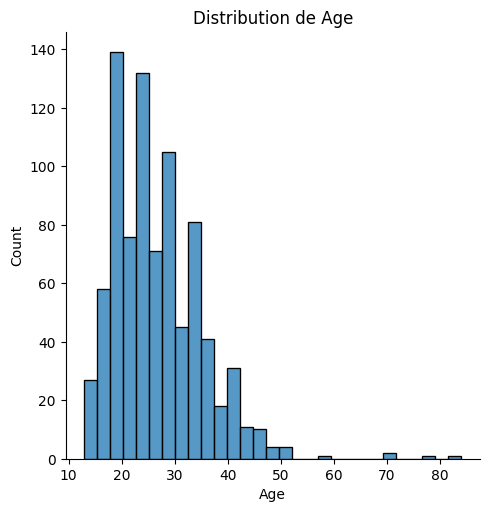

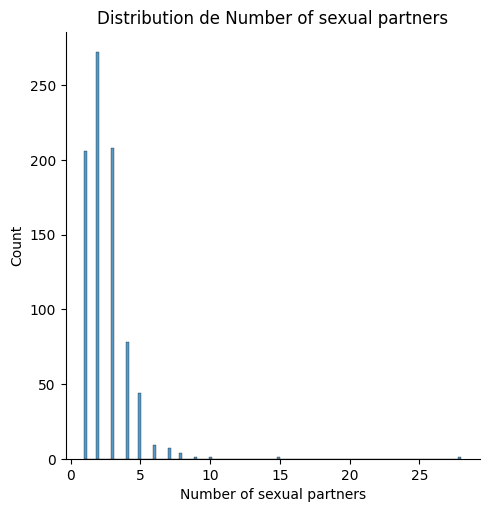

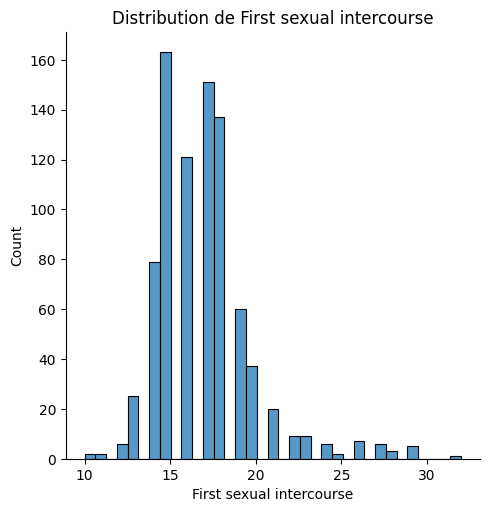

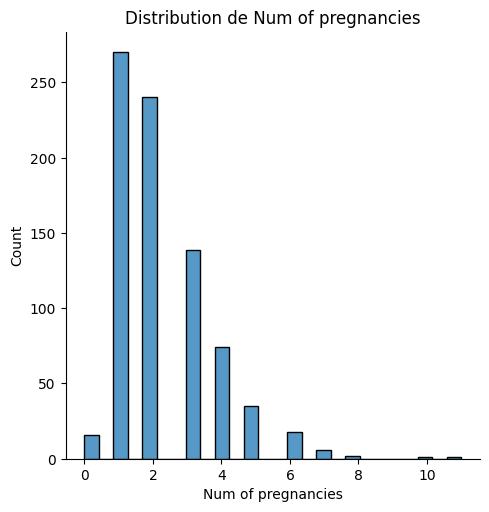

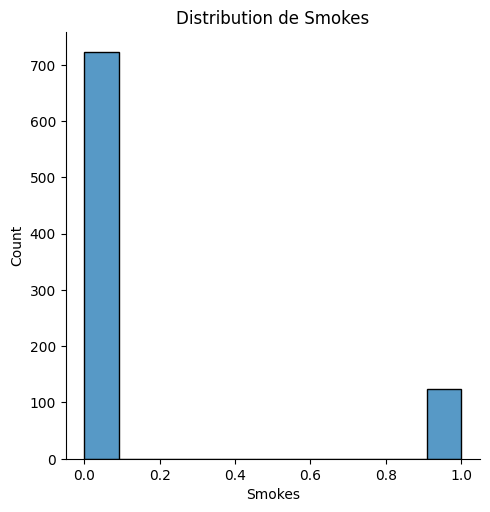

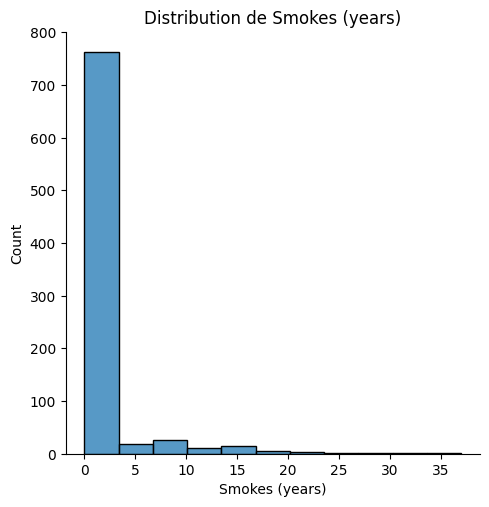

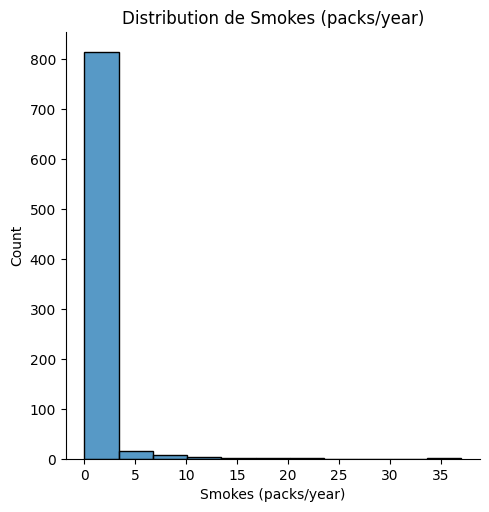

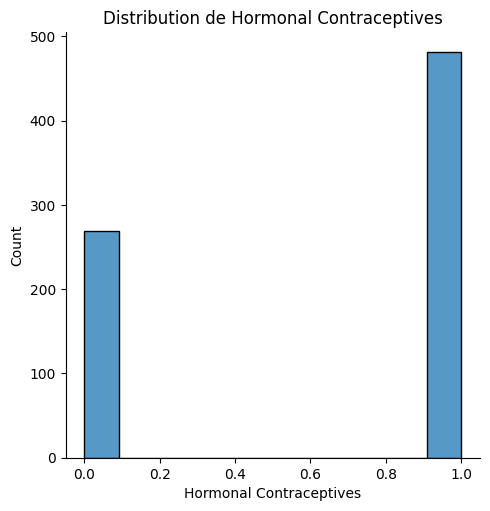

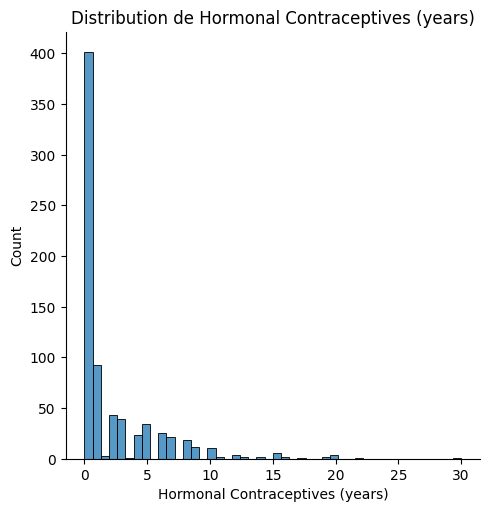

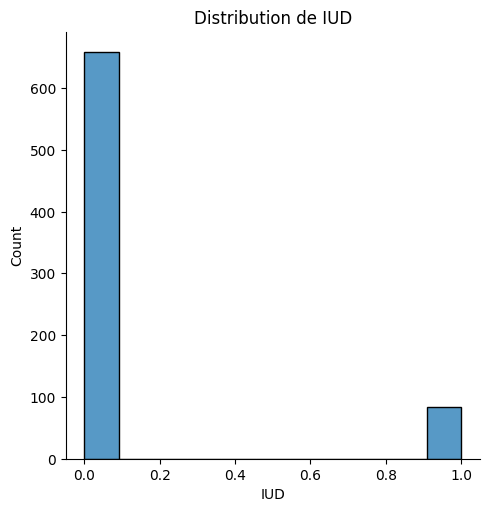

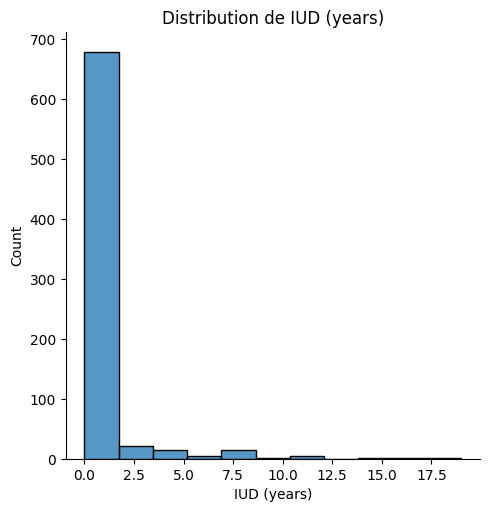

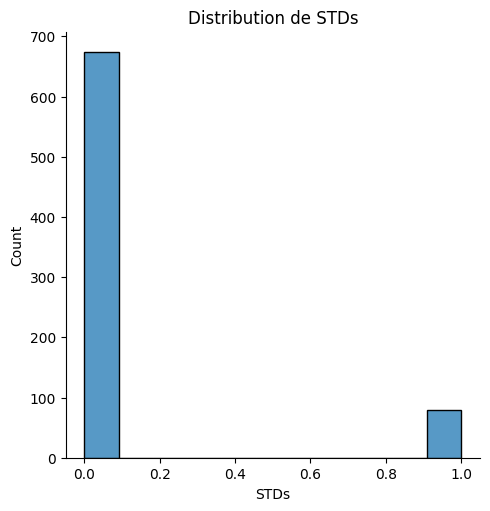

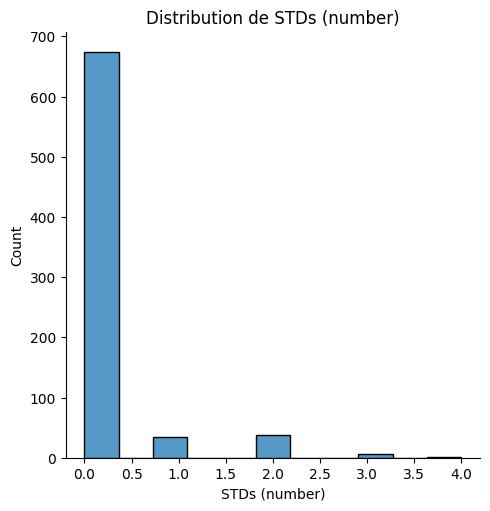

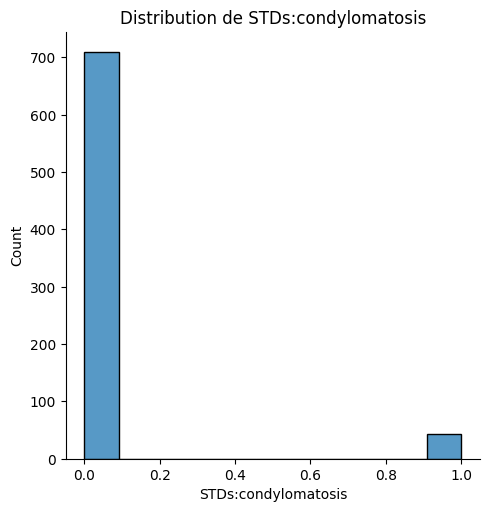

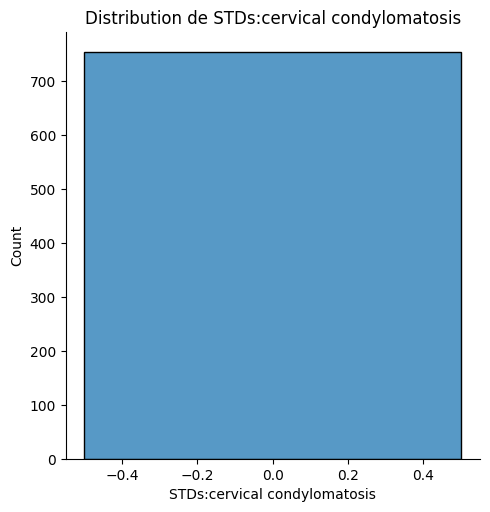

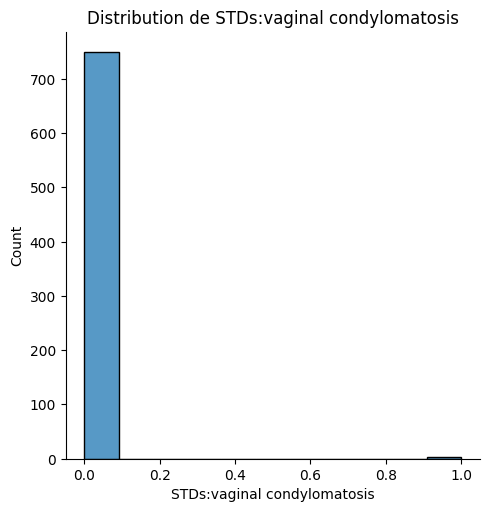

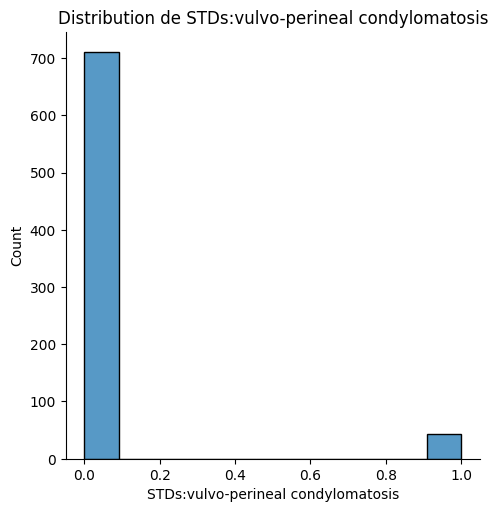

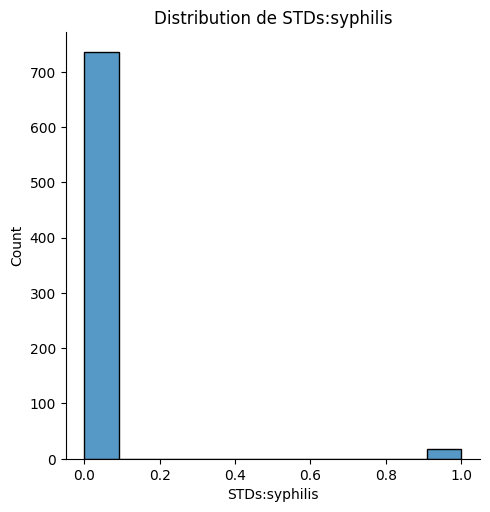

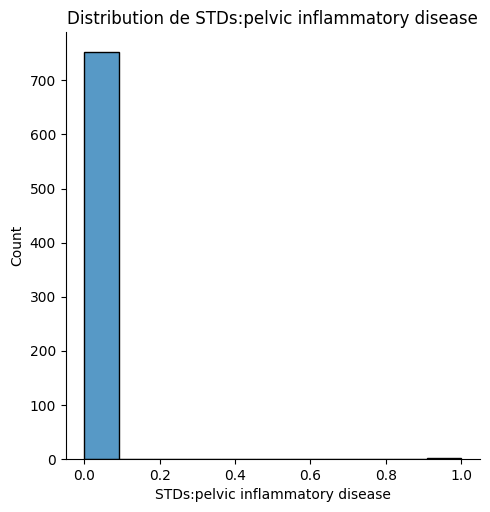

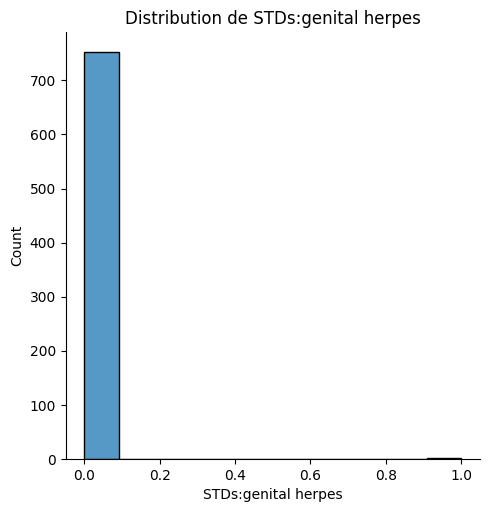

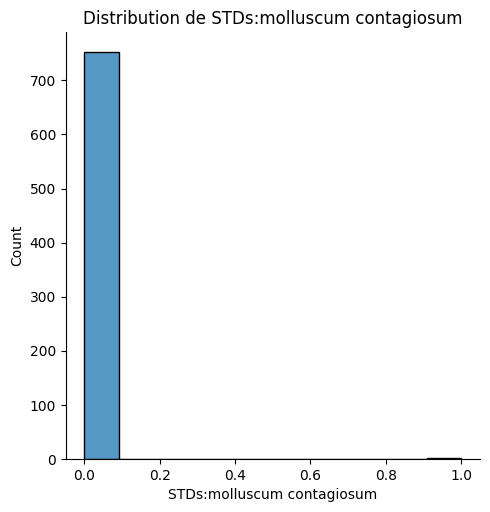

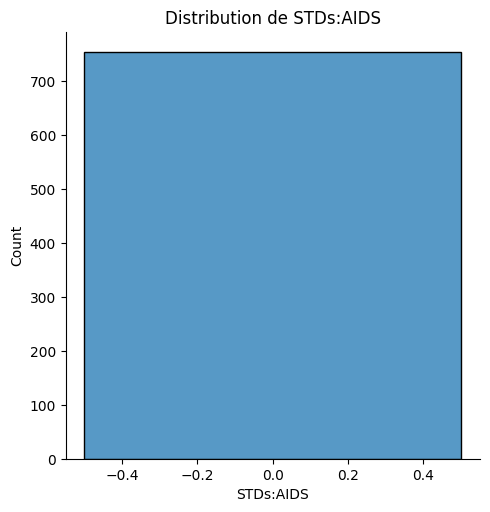

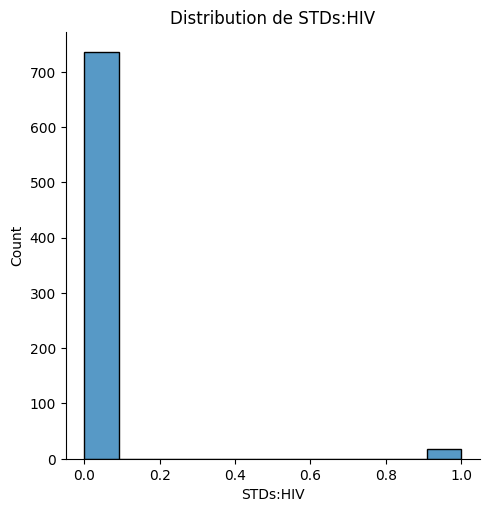

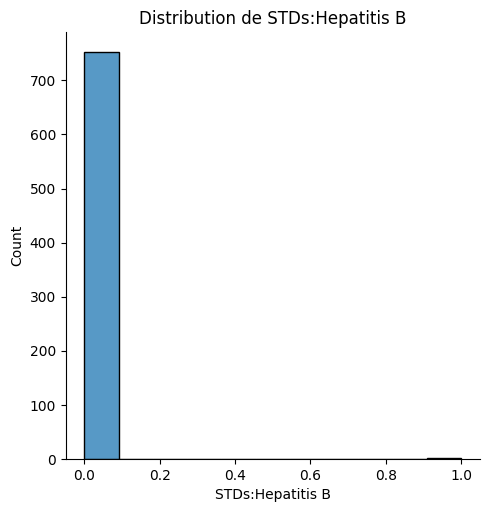

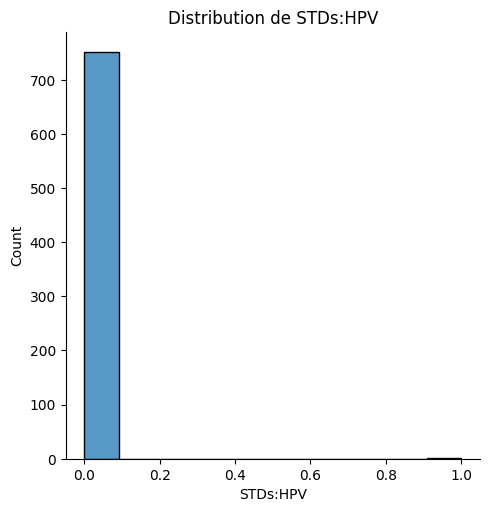

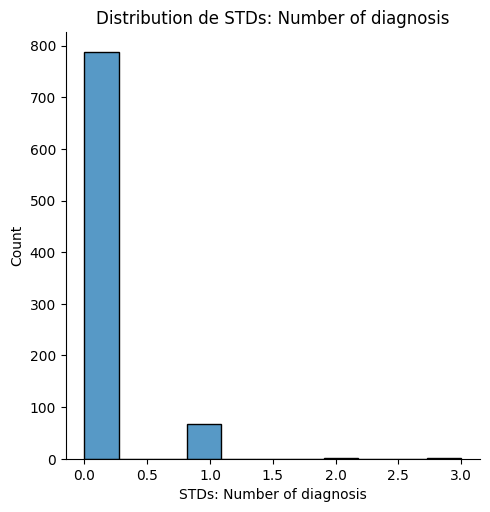

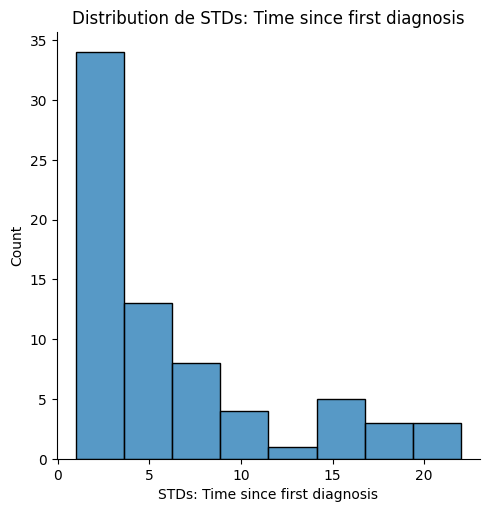

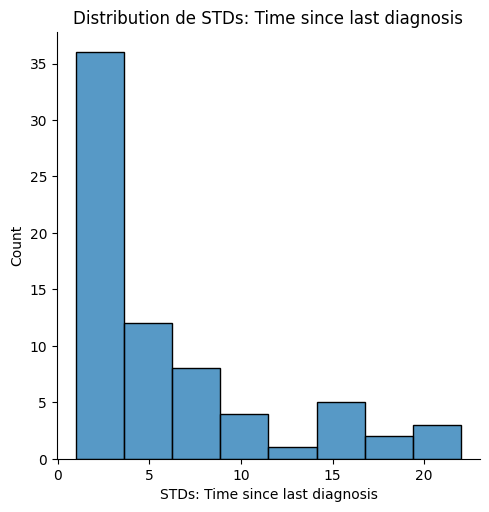

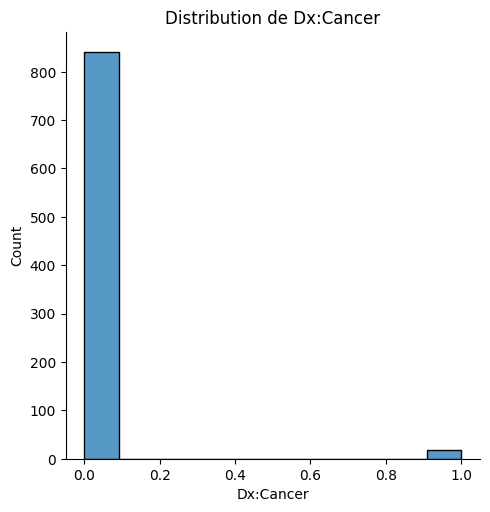

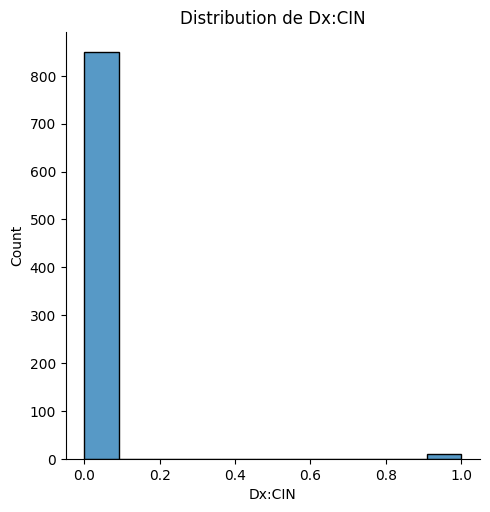

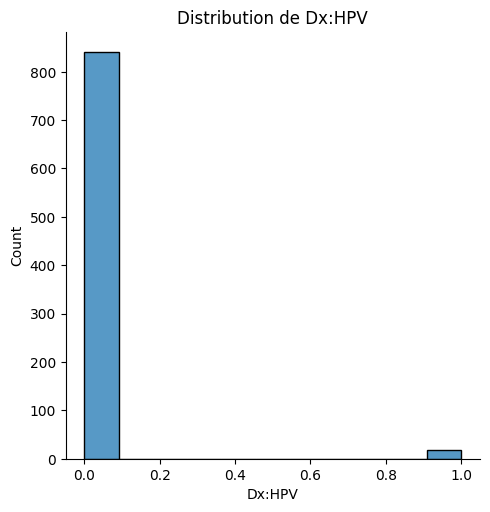

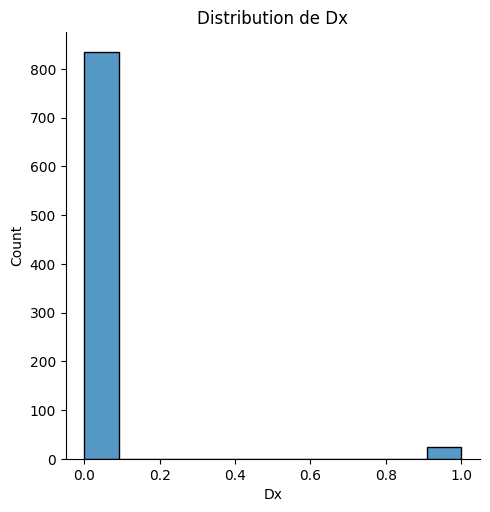

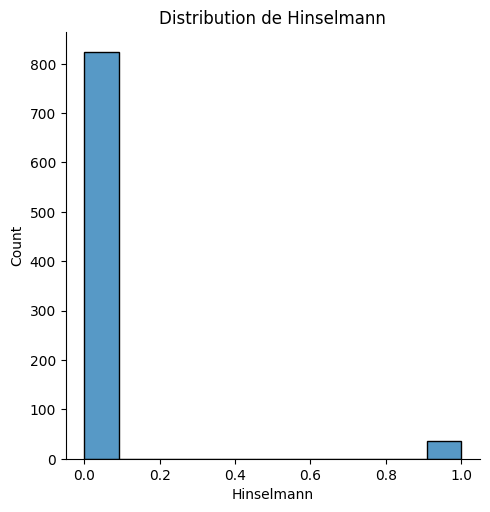

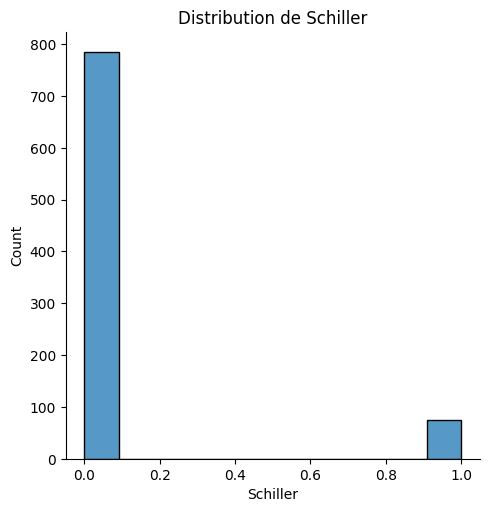

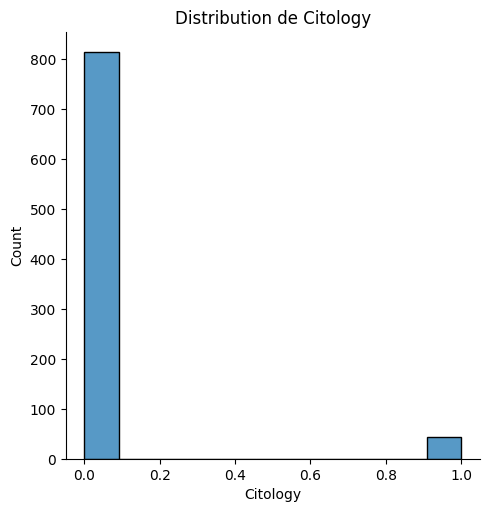

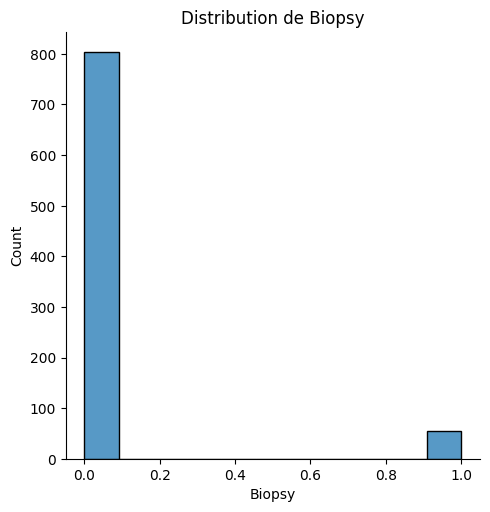

In [223]:
import seaborn as sns
import matplotlib.pyplot as plt

for colname in X.columns:
    sns.displot(data=X, x=colname)  # Spécifie le DataFrame et la colonne
    plt.title(f'Distribution de {colname}')  # Ajouter un titre pour chaque graphique
    plt.show()  # Affiche le graphique


In [224]:
X.isnull().sum()

Age                                     0
Number of sexual partners              26
First sexual intercourse                7
Num of pregnancies                     56
Smokes                                 13
Smokes (years)                         13
Smokes (packs/year)                    13
Hormonal Contraceptives               108
Hormonal Contraceptives (years)       108
IUD                                   117
IUD (years)                           117
STDs                                  105
STDs (number)                         105
STDs:condylomatosis                   105
STDs:cervical condylomatosis          105
STDs:vaginal condylomatosis           105
STDs:vulvo-perineal condylomatosis    105
STDs:syphilis                         105
STDs:pelvic inflammatory disease      105
STDs:genital herpes                   105
STDs:molluscum contagiosum            105
STDs:AIDS                             105
STDs:HIV                              105
STDs:Hepatitis B                  

In [225]:
# 2️⃣ Remplacement des valeurs manquantes pour les colonnes restantes
for column in X.columns:  # Utilisation de 'column' au lieu de 'columns'
    if X[column].dtype == "object":  # Si la colonne est catégorielle
        # Remplacement par la valeur la plus fréquente (modale)
        X[column] = X[column].fillna(X[column].mode()[0])  
    else:  # Si la colonne est numérique
        # Remplacement par la médiane
        X[column] = X[column].fillna(X[column].median())  

# 3️⃣ Vérification : afficher le nombre de valeurs manquantes restantes
print(f"Nombre total de valeurs manquantes après traitement : {X.isnull().sum().sum()}")  # Doit afficher 0


Nombre total de valeurs manquantes après traitement : 0


In [226]:
sns.pairplot(X)

In [227]:
X.head(10)

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18,4.0,15.0,1.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,4.0,3.0,0,0,0,0,0,0,0,0
1,15,1.0,14.0,1.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,4.0,3.0,0,0,0,0,0,0,0,0
2,34,1.0,17.0,1.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,4.0,3.0,0,0,0,0,0,0,0,0
3,52,5.0,16.0,4.0,1.0,37.000000,37.0,1.0,3.0,0.0,...,4.0,3.0,1,0,1,0,0,0,0,0
4,46,3.0,21.0,4.0,0.0,0.000000,0.0,1.0,15.0,0.0,...,4.0,3.0,0,0,0,0,0,0,0,0
5,42,3.0,23.0,2.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,4.0,3.0,0,0,0,0,0,0,0,0
6,51,3.0,17.0,6.0,1.0,34.000000,3.4,0.0,0.0,1.0,...,4.0,3.0,0,0,0,0,1,1,0,1
7,26,1.0,26.0,3.0,0.0,0.000000,0.0,1.0,2.0,1.0,...,4.0,3.0,0,0,0,0,0,0,0,0
8,45,1.0,20.0,5.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,4.0,3.0,1,0,1,1,0,0,0,0
9,44,3.0,15.0,2.0,1.0,1.266973,2.8,0.0,0.0,0.0,...,4.0,3.0,0,0,0,0,0,0,0,0


In [228]:
print(cervical_cancer_risk_factors.data)

{'ids': None, 'features':      Age  Number of sexual partners  First sexual intercourse  \
0     18                        4.0                      15.0   
1     15                        1.0                      14.0   
2     34                        1.0                      17.0   
3     52                        5.0                      16.0   
4     46                        3.0                      21.0   
..   ...                        ...                       ...   
853   34                        3.0                      18.0   
854   32                        2.0                      19.0   
855   25                        2.0                      17.0   
856   33                        2.0                      24.0   
857   29                        2.0                      20.0   

     Num of pregnancies  Smokes  Smokes (years)  Smokes (packs/year)  \
0                   1.0     0.0             0.0                  0.0   
1                   1.0     0.0             0.0  

In [229]:
print(X.isnull().sum())

Age                                   0
Number of sexual partners             0
First sexual intercourse              0
Num of pregnancies                    0
Smokes                                0
Smokes (years)                        0
Smokes (packs/year)                   0
Hormonal Contraceptives               0
Hormonal Contraceptives (years)       0
IUD                                   0
IUD (years)                           0
STDs                                  0
STDs (number)                         0
STDs:condylomatosis                   0
STDs:cervical condylomatosis          0
STDs:vaginal condylomatosis           0
STDs:vulvo-perineal condylomatosis    0
STDs:syphilis                         0
STDs:pelvic inflammatory disease      0
STDs:genital herpes                   0
STDs:molluscum contagiosum            0
STDs:AIDS                             0
STDs:HIV                              0
STDs:Hepatitis B                      0
STDs:HPV                              0


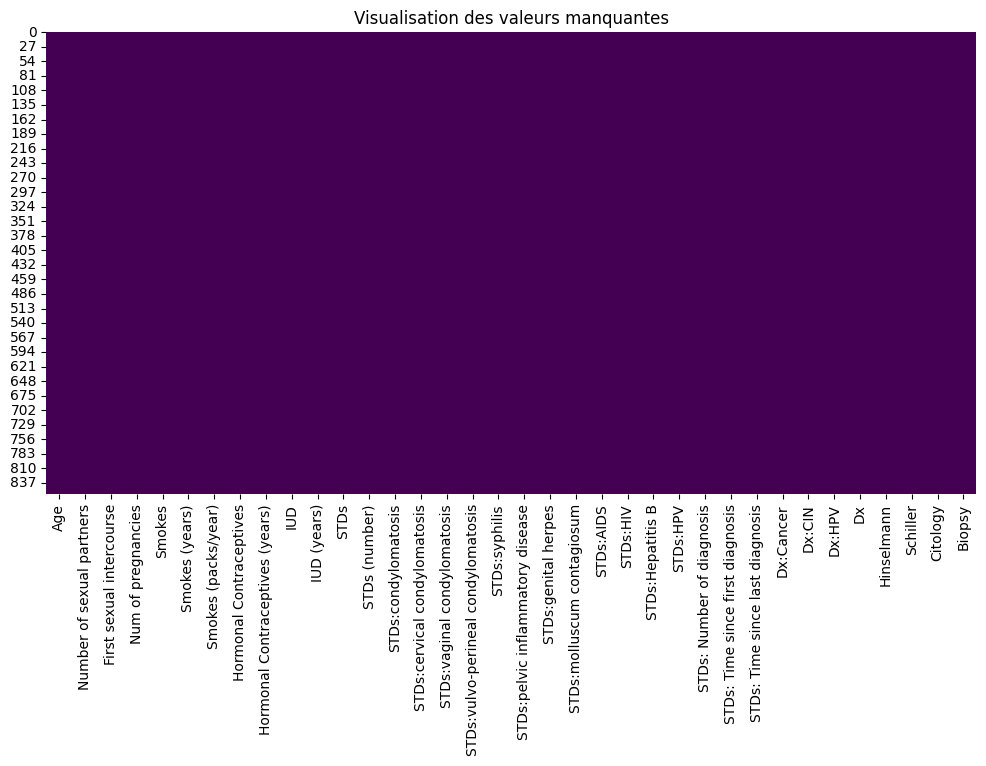

In [230]:
plt.figure(figsize=(12, 6))
sns.heatmap(X.isnull(), cbar=False, cmap="viridis")
plt.title("Visualisation des valeurs manquantes")
plt.show()

In [231]:
print(X.shape)


(858, 36)


In [232]:
X = X.drop(columns=X.columns[X.isnull().sum() == 787])

           

In [233]:
print(X.shape)

(858, 36)


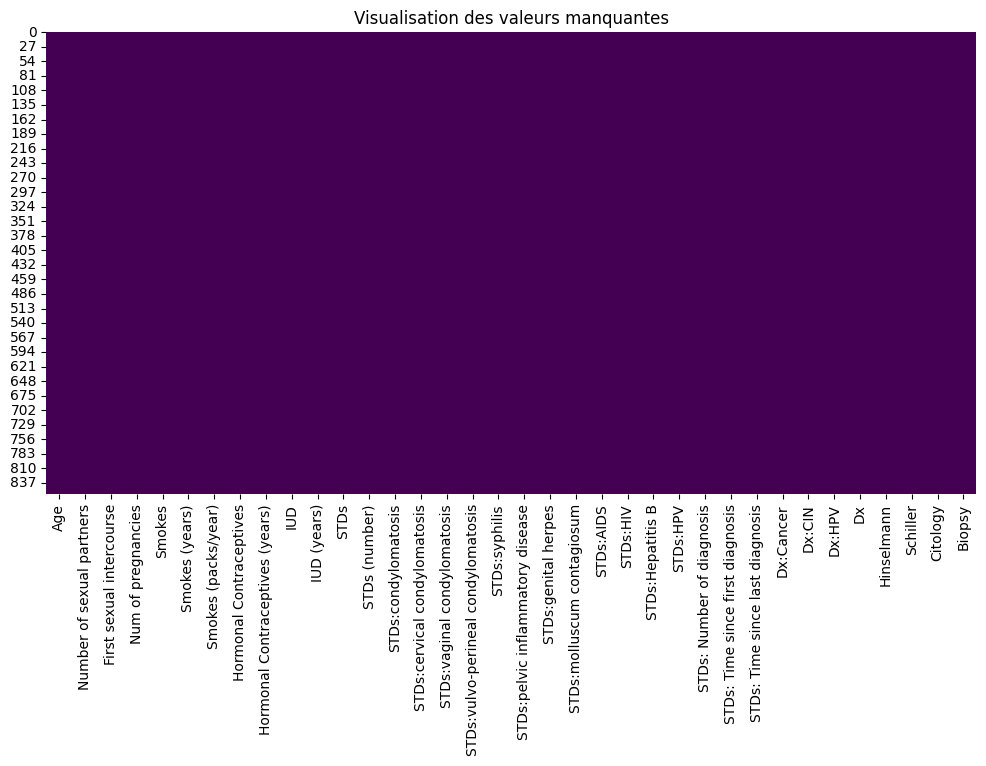

In [234]:
plt.figure(figsize=(12, 6))
sns.heatmap(X.isnull(), cbar=False, cmap="viridis")
plt.title("Visualisation des valeurs manquantes")
plt.show()

In [235]:
# 2️⃣ Remplacement des valeurs manquantes pour les colonnes restantes
for column in X.columns:  # Itération sur chaque colonne
    if X[column].dtype == "object":  # Si la colonne est catégorielle
        # Remplacement par la valeur la plus fréquente (modale)
        X[column] = X[column].fillna(X[column].mode()[0])  
    else:  # Si la colonne est numérique
        # Remplacement par la médiane
        X[column] = X[column].fillna(X[column].median())  

# 3️⃣ Vérification : afficher le nombre de valeurs manquantes restantes
print(f"Nombre total de valeurs manquantes après traitement : {X.isnull().sum().sum()}")  # Doit afficher 0


Nombre total de valeurs manquantes après traitement : 0


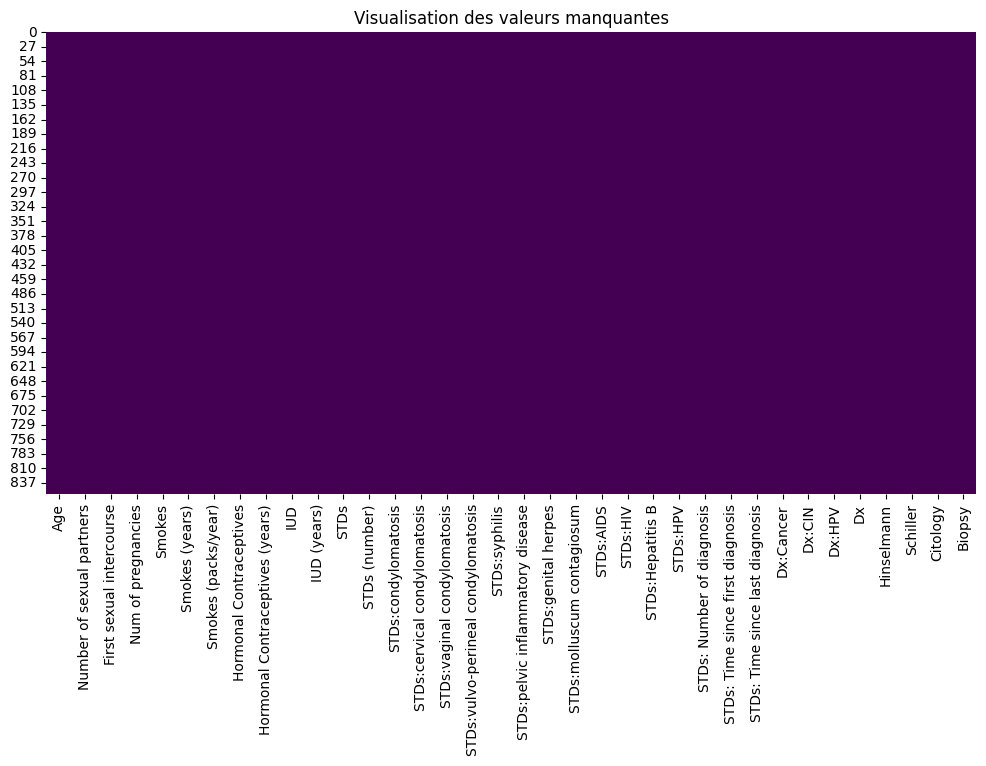

In [236]:
plt.figure(figsize=(12, 6))
sns.heatmap(X.isnull(), cbar=False, cmap="viridis")
plt.title("Visualisation des valeurs manquantes")
plt.show()

In [237]:
print(X.duplicated().sum())  # Affiche le nombre de doublons


28


In [246]:
X = X.drop_duplicates()


In [239]:
print(X.duplicated().sum())  # Doit afficher 0 si tous les doublons ont été supprimés


0


In [240]:
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)  # Transforme les données

# Convertir en DataFrame avec les mêmes noms de colonnes
X = pd.DataFrame(X_scaled, columns=X.columns)

print(X.head())  # Vérification


        Age  Number of sexual partners  First sexual intercourse  \
0  0.070423                   0.111111                  0.227273   
1  0.028169                   0.000000                  0.181818   
2  0.295775                   0.000000                  0.318182   
3  0.549296                   0.148148                  0.272727   
4  0.464789                   0.074074                  0.500000   

   Num of pregnancies  Smokes  Smokes (years)  Smokes (packs/year)  \
0            0.090909     0.0             0.0                  0.0   
1            0.090909     0.0             0.0                  0.0   
2            0.090909     0.0             0.0                  0.0   
3            0.363636     1.0             1.0                  1.0   
4            0.363636     0.0             0.0                  0.0   

   Hormonal Contraceptives  Hormonal Contraceptives (years)  IUD  ...  \
0                      0.0                              0.0  0.0  ...   
1                      0

In [241]:


# Supposons que vous ayez déjà défini votre DataFrame 'data' quelque part dans votre code
# Exemple de création d'un DataFrame (remplacez ceci par votre propre code)


def detect_outliers_iqr(X):
    outliers_dict = {}
    for column in X.select_dtypes(include=['float64', 'int64']).columns:
        Q1 = X[column].quantile(0.25)
        Q3 = X[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers = X[(X[column] < lower_bound) | (X[column] > upper_bound)]
        outliers_dict[column] = outliers
    return outliers_dict

# Application
outliers = detect_outliers_iqr(X)
for colonne, outlier_data in outliers.items():
    print(f"Outliers dans {colonne}:")
    print(outlier_data)


Outliers dans Age:
          Age  Number of sexual partners  First sexual intercourse  \
3    0.549296                   0.148148                  0.272727   
6    0.535211                   0.074074                  0.318182   
628  0.647887                   0.037037                  0.136364   
643  0.929577                   0.037037                  0.272727   
644  1.000000                   0.074074                  0.454545   
647  0.549296                   0.037037                  0.409091   
652  0.802817                   0.111111                  0.772727   
655  0.521127                   0.037037                  0.318182   
656  0.507042                   0.074074                  0.227273   
658  0.802817                   0.000000                  0.272727   
661  0.507042                   0.037037                  0.227273   

     Num of pregnancies  Smokes  Smokes (years)  Smokes (packs/year)  \
3              0.363636     1.0        1.000000             1.000000

In [242]:


def detect_outliers_iqr(X):
    outliers_dict = {}
    for column in X.select_dtypes(include=['float64', 'int64']).columns:
        Q1 = X[column].quantile(0.25)
        Q3 = X[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers = X[(X[column] < lower_bound) | (X[column] > upper_bound)]
        outliers_dict[column] = outliers
    return outliers_dict

# Détecter les outliers
outliers = detect_outliers_iqr(X)

# Supprimer les outliers
for column in outliers.keys():
    data = data[~data.index.isin(outliers[column].index)]

# Afficher le DataFrame nettoyé
print("DataFrame après suppression des outliers :")
print(data)


DataFrame après suppression des outliers :
Empty DataFrame
Columns: [age, income]
Index: []


In [243]:
import pandas as pd
import numpy as np
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Génération de données fictives pour éviter l'utilisation d'un fichier
from sklearn.datasets import make_classification

# Création d'un dataset déséquilibré
X, y = make_classification(n_classes=2, class_sep=2, weights=[0.1, 0.9],
                           n_informative=3, n_redundant=1, flip_y=0,
                           n_features=10, n_clusters_per_class=1, n_samples=1000, random_state=42)

# Encodage des labels si nécessaire
if y.dtype == 'object':
    le = LabelEncoder()
    y = le.fit_transform(y)

# Division des données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Application de SMOTE pour l'oversampling de la classe minoritaire
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Vérification des nouvelles distributions
print("Distribution des classes avant SMOTE:", np.bincount(y_train))
print("Distribution des classes après SMOTE:", np.bincount(y_train_resampled))


Distribution des classes avant SMOTE: [ 80 720]
Distribution des classes après SMOTE: [720 720]


Nombre de caractéristiques initiales : 10
Nombre de caractéristiques après élimination des corrélations > 0.8 : 10


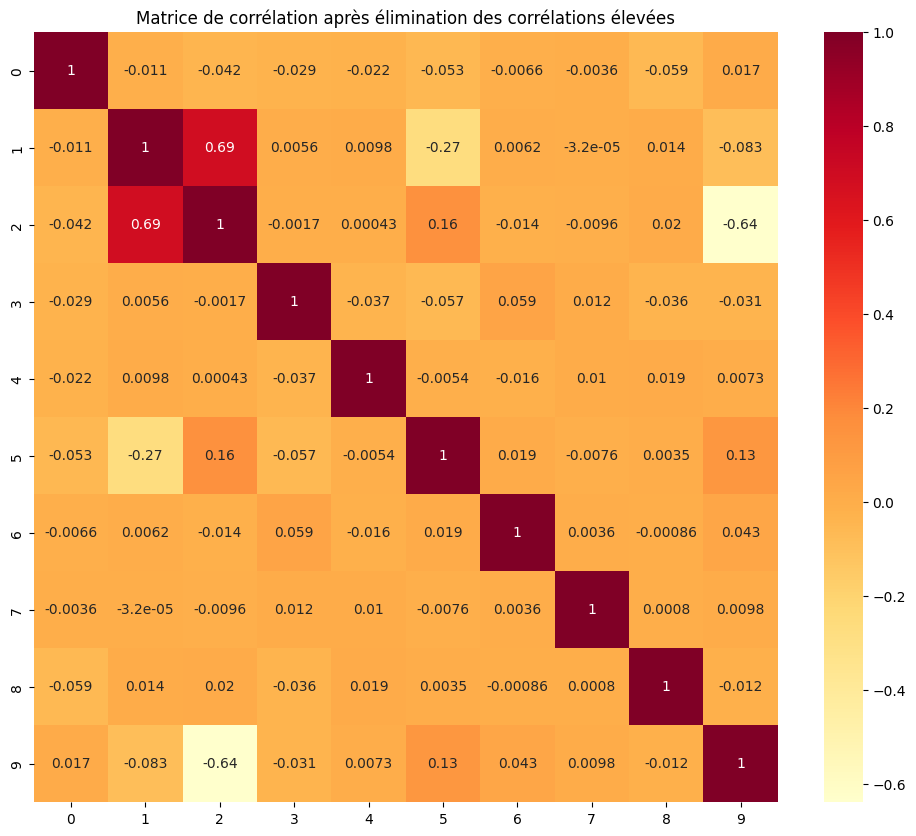

In [244]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Chargement des données
X = pd.DataFrame(X)  # Assurez-vous que X est un DataFrame Pandas

# Suppression des caractéristiques avec une forte corrélation
corr_matrix = X.corr().abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
to_drop = [column for column in upper.columns if any(upper[column] > 0.8)]

X_cleaned = X.drop(to_drop, axis=1)
print(f"Nombre de caractéristiques initiales : {X.shape[1]}")
print(f"Nombre de caractéristiques après élimination des corrélations > 0.8 : {X_cleaned.shape[1]}")

# Génération de la nouvelle matrice de corrélation
corr_matrix_cleaned = X_cleaned.corr()

# Visualisation de la matrice de corrélation
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix_cleaned, annot=True, cmap='YlOrRd')
plt.title('Matrice de corrélation après élimination des corrélations élevées')
plt.show()


In [247]:
import pandas as pd

X_cleaned.to_csv("data_cleaned.csv", index=False)
